In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'C:\Users\sumay\Downloads\Customer Churn Prediction\data\Bank Customer Churn Prediction.csv')

In [4]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [9]:
data=data.drop(['customer_id'],axis=1)

In [10]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [13]:
country=enc.fit_transform(data['country'])

In [14]:
gender=enc.fit_transform(data['gender'])

In [15]:
country

array([0, 2, 0, ..., 0, 1, 0])

In [16]:
gender

array([0, 0, 0, ..., 0, 1, 0])

In [17]:
data['gender']=gender
data['country']=country

In [18]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

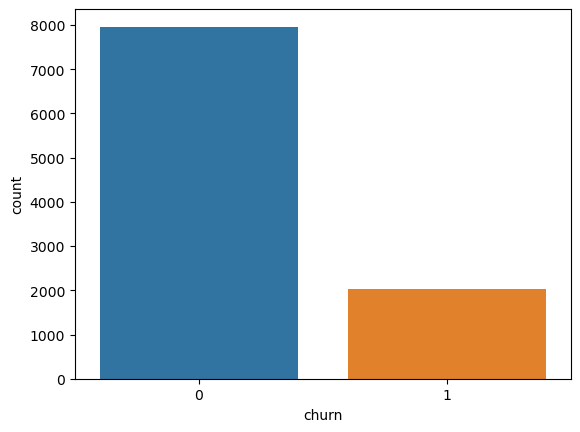

In [19]:
sns.countplot(x=data['churn'])

In [20]:
x=data.drop('churn',axis=1)
y=data['churn']

In [21]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [22]:
x.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [23]:
from imblearn.over_sampling import SMOTE
x_res,y_res= SMOTE().fit_resample(x,y)


In [24]:
y_res.value_counts()

1    7963
0    7963
Name: churn, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [27]:
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)

In [28]:
x_train_std

array([[-1.442829  , -0.89217743, -0.84797774, ...,  0.77790776,
         1.30967936, -0.50499938],
       [ 1.10448114, -0.89217743,  1.17927623, ..., -1.28549945,
         1.30967936,  0.75043436],
       [-0.03251566, -0.89217743,  1.17927623, ...,  0.77790776,
        -0.76354567,  0.0679995 ],
       ...,
       [ 0.2080029 , -0.89217743,  1.17927623, ...,  0.77790776,
        -0.76354567, -0.04799765],
       [-0.57914873, -0.89217743, -0.84797774, ...,  0.77790776,
        -0.76354567,  1.21773461],
       [ 0.53598274,  0.43179933,  1.17927623, ...,  0.77790776,
         1.30967936, -0.80994171]])

In [29]:
#DECISION TREE

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [31]:
dt.fit(x_train_std,y_train)

DecisionTreeClassifier()

In [32]:
y_pred=dt.predict(x_test_std)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
ac_dc=accuracy_score(y_test,y_pred)

In [35]:
ac_dc

0.7978656622724419

In [36]:
from sklearn.metrics import precision_score

In [37]:
pc_dc=precision_score(y_test,y_pred)

In [38]:
pc_dc

0.7807288449660285

In [39]:
#LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [41]:
lr.fit(x_train_std,y_train)

LogisticRegression()

In [42]:
y_pred1=lr.predict(x_test_std)

In [43]:
ac_lr=accuracy_score(y_test,y_pred1)

In [44]:
ac_lr

0.7693032015065914

In [45]:
pc_lr=precision_score(y_test,y_pred1)

In [46]:
pc_lr

0.7543532338308457

In [47]:
#KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [49]:
knn.fit(x_train_std,y_train)

KNeighborsClassifier()

In [50]:
y_pred2=knn.predict(x_test_std)

In [51]:
ac_knn=accuracy_score(y_test,y_pred2)

In [52]:
ac_knn

0.8207784055241683

In [53]:
pc_knn=precision_score(y_test,y_pred2)

In [54]:
pc_knn

0.8015970515970516

In [55]:
#Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [57]:
rf.fit(x_train_std,y_train)

RandomForestClassifier()

In [58]:
y_pred3=rf.predict(x_test_std)

In [59]:
ac_rf=accuracy_score(y_test,y_pred3)

In [60]:
ac_rf

0.85969868173258

In [61]:
pc_rf=precision_score(y_test,y_pred3)

In [62]:
pc_rf

0.8460575719649562

In [63]:
#SVM

In [64]:
from sklearn.svm import SVC
sv=SVC()

In [65]:
sv.fit(x_train_std,y_train)

SVC()

In [66]:
y_pred4=sv.predict(x_test_std)

In [67]:
ac_sv=accuracy_score(y_test,y_pred4)

In [68]:
ac_sv

0.8405524168236033

In [69]:
pc_sv=precision_score(y_test,y_pred4)

In [70]:
pc_sv

0.8325907065563335

In [71]:
#Gradient Boosting 

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [73]:
gb.fit(x_train_std,y_train)

GradientBoostingClassifier()

In [74]:
y_pred5=gb.predict(x_test_std)

In [75]:
ac_gb=accuracy_score(y_test,y_pred5)

In [76]:
ac_gb

0.8418079096045198

In [77]:
pc_gb=precision_score(y_test,y_pred5)

In [78]:
pc_gb

0.8364336112892881

In [79]:
final_data=pd.DataFrame({'Models':['DT','LR','KNN','RF','SVC','GB'],
                        'Accuracy':[accuracy_score(y_test,y_pred),
                        accuracy_score(y_test,y_pred1),
                        accuracy_score(y_test,y_pred2),
                        accuracy_score(y_test,y_pred3),
                        accuracy_score(y_test,y_pred4),
                        accuracy_score(y_test,y_pred5)]})

In [80]:
final_data

,Models,Accuracy
0,DT,0.797866
1,LR,0.769303
2,KNN,0.820778
3,RF,0.859699
4,SVC,0.840552
5,GB,0.841808


<Axes: xlabel='Models', ylabel='Accuracy'>

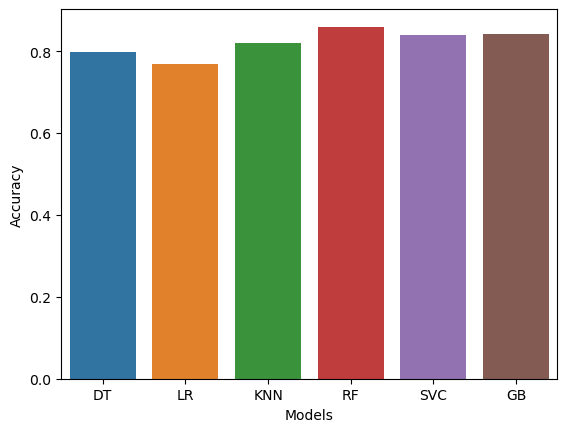

In [81]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])